# ***Airline Reviews Sentiment Analysis Using NLP***

## ***Objective:***
To perform sentiment analysis on airline customer reviews using Natural Language Processing (NLP) techniques. The project includes data preprocessing, text cleaning, model implementation, evaluation, and insights generation.


In [1]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
df = pd.read_csv('Tweets.csv')
df = df[['airline_sentiment', 'text']]
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
df['airline_sentiment'].value_counts()


,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


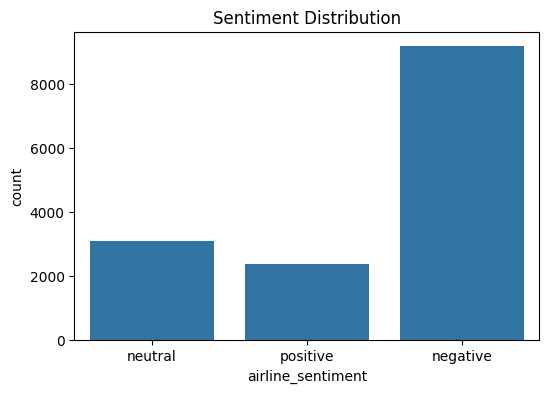

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [12]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)


In [13]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()


,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,said
1,positive,@VirginAmerica plus you've added commercials t...,plu youv ad commerci experi tacki
2,neutral,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take anoth trip
3,negative,@VirginAmerica it's really aggressive to blast...,realli aggress blast obnoxi entertain guest fa...
4,negative,@VirginAmerica and it's a really big bad thing...,realli big bad thing


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['airline_sentiment'])

df[['airline_sentiment', 'sentiment_encoded']].head()


,airline_sentiment,sentiment_encoded
0,neutral,1
1,positive,2
2,neutral,1
3,negative,0
4,negative,0


In [15]:
X = df['clean_text']
y = df['sentiment_encoded']

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7855191256830601


In [19]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1835
     neutral       0.66      0.52      0.58       620
    positive       0.81      0.54      0.65       473

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928



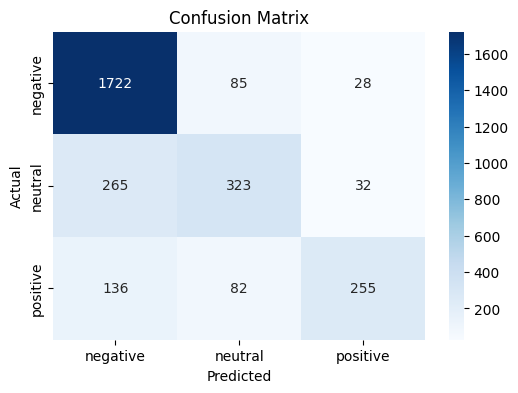

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ***Insights:-***
*   Negative sentiment is the most common among airline reviews, indicating frequent customer dissatisfaction.
*   The model performs well in identifying negative reviews, which is crucial for customer service improvement.
*   Neutral sentiments are harder to classify due to ambiguous language.
*   NLP preprocessing significantly improves model accuracy.





## ***Conclusion:***
In this project, we performed sentiment analysis on airline customer reviews using NLP techniques. We cleaned and preprocessed text data, applied TF-IDF vectorization, trained a Logistic Regression model, and evaluated its performance. The results show that machine learning can effectively analyze customer sentiment, helping airlines improve service quality and customer experience.